In [2]:
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [3]:
df=pd.read_csv('train.csv')

In [4]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [5]:
df.shape

(381109, 12)

In [6]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [7]:
df.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

In [8]:
df['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

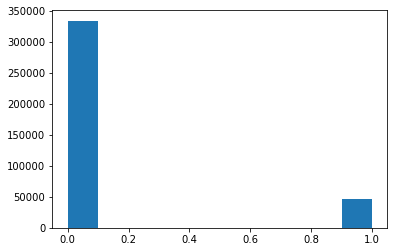

In [9]:
x=df['Response']

plt.hist(x)
plt.show()

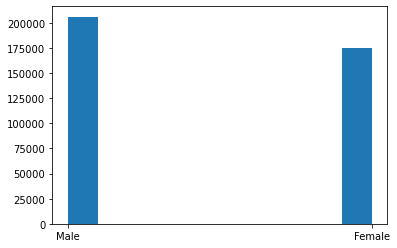

Male      206089
Female    175020
Name: Gender, dtype: int64


In [10]:
x=df['Gender']

plt.hist(x)
plt.show()

print(df['Gender'].value_counts())

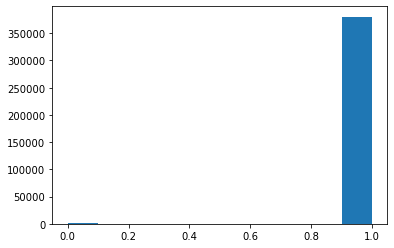

1    380297
0       812
Name: Driving_License, dtype: int64


In [11]:
x=df['Driving_License']

plt.hist(x)
plt.show()

print(df['Driving_License'].value_counts())

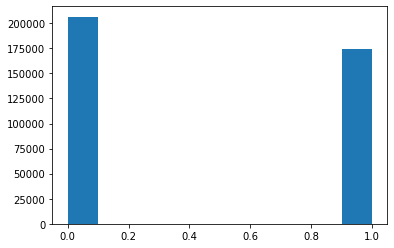

0    206481
1    174628
Name: Previously_Insured, dtype: int64


In [12]:
x=df['Previously_Insured']

plt.hist(x)
plt.show()

print(df['Previously_Insured'].value_counts())

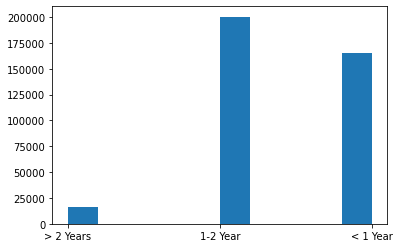

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64


In [13]:
x=df['Vehicle_Age']

plt.hist(x)
plt.show()

print(df['Vehicle_Age'].value_counts())

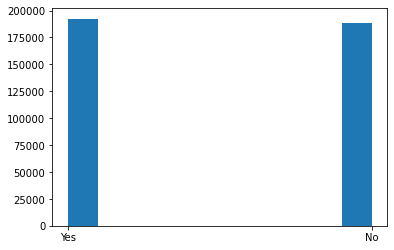

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64


In [14]:
x=df['Vehicle_Damage']

plt.hist(x)
plt.show()

print(df['Vehicle_Damage'].value_counts())

In [15]:
X=df.drop(['id','Driving_License', 'Response'], axis=1)
y=df['Response']

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=42)

In [16]:
X_train.shape

(266776, 9)

In [17]:
X_test

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
200222,Female,21,3.0,1,< 1 Year,No,20408.0,160.0,72
49766,Male,55,15.0,0,1-2 Year,Yes,37498.0,26.0,102
172201,Female,41,3.0,0,1-2 Year,Yes,2630.0,26.0,90
160713,Female,26,11.0,0,< 1 Year,No,2630.0,151.0,268
53272,Male,51,40.0,0,1-2 Year,Yes,34006.0,124.0,265
...,...,...,...,...,...,...,...,...,...
181785,Female,24,8.0,1,< 1 Year,No,63100.0,152.0,166
48818,Male,30,28.0,1,< 1 Year,No,2630.0,160.0,161
200419,Female,41,36.0,1,1-2 Year,No,2630.0,152.0,170
261443,Female,29,50.0,1,< 1 Year,No,49693.0,152.0,272


In [18]:
cat_df=X_train[['Gender','Previously_Insured','Vehicle_Age','Vehicle_Damage']]

In [19]:
cat_df

,Gender,Previously_Insured,Vehicle_Age,Vehicle_Damage
55914,Male,0,1-2 Year,Yes
179876,Male,0,> 2 Years,Yes
300095,Female,1,< 1 Year,No
60078,Male,1,1-2 Year,No
312426,Male,0,< 1 Year,Yes
...,...,...,...,...
259178,Female,1,< 1 Year,No
365838,Male,0,1-2 Year,Yes
131932,Female,0,< 1 Year,Yes
146867,Male,1,1-2 Year,Yes


In [20]:
label_encoder = preprocessing.LabelEncoder()
  
cat_df['Gender']= label_encoder.fit_transform(cat_df['Gender'])
cat_df['Vehicle_Age']= label_encoder.fit_transform(cat_df['Vehicle_Age'])
cat_df['Vehicle_Damage']= label_encoder.fit_transform(cat_df['Vehicle_Damage'])
cat_df


C:\Users\PB937FZ\AppData\Local\Temp\ipykernel_18444\2841505347.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['Gender']= label_encoder.fit_transform(cat_df['Gender'])
C:\Users\PB937FZ\AppData\Local\Temp\ipykernel_18444\2841505347.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['Vehicle_Age']= label_encoder.fit_transform(cat_df['Vehicle_Age'])
C:\Users\PB937FZ\AppData\Local\Temp\ipykernel_18444\2841505347.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

,Gender,Previously_Insured,Vehicle_Age,Vehicle_Damage
55914,1,0,0,1
179876,1,0,2,1
300095,0,1,1,0
60078,1,1,0,0
312426,1,0,1,1
...,...,...,...,...
259178,0,1,1,0
365838,1,0,0,1
131932,0,0,1,1
146867,1,1,0,1


In [21]:
from sklearn.feature_selection import chi2
f_p_values=chi2(cat_df,y_train)
f_p_values

(array([  336.56686809, 16770.34502848,  1845.92380239, 16441.9362723 ]),
 array([3.56908311e-75, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]))

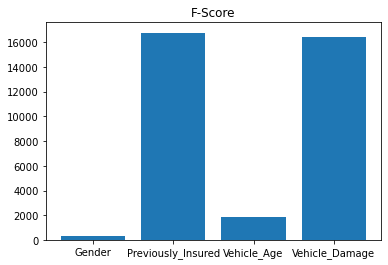

In [22]:
plt.bar(['Gender','Previously_Insured','Vehicle_Age','Vehicle_Damage'],f_p_values[0])
plt.title('F-Score')
plt.show()

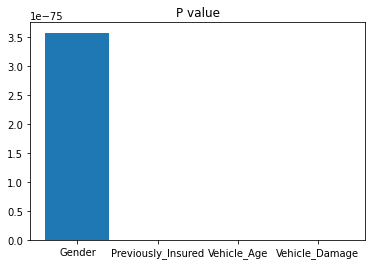

In [23]:
plt.bar(['Gender','Previously_Insured','Vehicle_Age','Vehicle_Damage'],f_p_values[1])
plt.title('P value')
plt.show()

In [24]:
cat_df=cat_df.drop(['Gender', 'Vehicle_Age'], axis=1)
cat_df

,Previously_Insured,Vehicle_Damage
55914,0,1
179876,0,1
300095,1,0
60078,1,0
312426,0,1
...,...,...
259178,1,0
365838,0,1
131932,0,1
146867,1,1


In [25]:
label_encoder = preprocessing.LabelEncoder()
  
X_train['Gender']= label_encoder.fit_transform(X_train['Gender'])
X_train['Vehicle_Age']= label_encoder.fit_transform(X_train['Vehicle_Age'])
X_train['Vehicle_Damage']= label_encoder.fit_transform(X_train['Vehicle_Damage'])
X_train



label_encoder = preprocessing.LabelEncoder()
  
X_test['Gender']= label_encoder.fit_transform(X_test['Gender'])
X_test['Vehicle_Age']= label_encoder.fit_transform(X_test['Vehicle_Age'])
X_test['Vehicle_Damage']= label_encoder.fit_transform(X_test['Vehicle_Damage'])
X_test


,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
200222,0,21,3.0,1,1,0,20408.0,160.0,72
49766,1,55,15.0,0,0,1,37498.0,26.0,102
172201,0,41,3.0,0,0,1,2630.0,26.0,90
160713,0,26,11.0,0,1,0,2630.0,151.0,268
53272,1,51,40.0,0,0,1,34006.0,124.0,265
...,...,...,...,...,...,...,...,...,...
181785,0,24,8.0,1,1,0,63100.0,152.0,166
48818,1,30,28.0,1,1,0,2630.0,160.0,161
200419,0,41,36.0,1,0,0,2630.0,152.0,170
261443,0,29,50.0,1,1,0,49693.0,152.0,272


In [26]:
X_train.assign(Response=y_train).corr()

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
Gender,1.000000,0.144287,0.001514,-0.082318,-0.113452,0.092766,0.001891,-0.111781,-0.002789,0.052399
Age,0.144287,1.000000,0.043263,-0.253926,-0.520816,0.267796,0.066597,-0.576632,-0.001507,0.110885
Region_Code,0.001514,0.043263,1.000000,-0.022547,-0.027180,0.026527,-0.009763,-0.042430,-0.003318,0.011339
Previously_Insured,-0.082318,-0.253926,-0.022547,1.000000,0.173689,-0.824702,0.002790,0.220745,0.002617,-0.340661
Vehicle_Age,-0.113452,-0.520816,-0.027180,0.173689,1.000000,-0.173219,0.023939,0.387355,0.002357,-0.103347
Vehicle_Damage,0.092766,0.267796,0.026527,-0.824702,-0.173219,1.000000,0.009094,-0.225177,-0.002687,0.352966
Annual_Premium,0.001891,0.066597,-0.009763,0.002790,0.023939,0.009094,1.000000,-0.112072,0.000114,0.022345
Policy_Sales_Channel,-0.111781,-0.576632,-0.042430,0.220745,0.387355,-0.225177,-0.112072,1.000000,-0.000807,-0.137837
Vintage,-0.002789,-0.001507,-0.003318,0.002617,0.002357,-0.002687,0.000114,-0.000807,1.000000,-0.001125
Response,0.052399,0.110885,0.011339,-0.340661,-0.103347,0.352966,0.022345,-0.137837,-0.001125,1.000000


In [27]:
abs(X_train.assign(Response=y_train).corr()['Response']).sort_values(ascending=False)

Response                1.000000
Vehicle_Damage          0.352966
Previously_Insured      0.340661
Policy_Sales_Channel    0.137837
Age                     0.110885
Vehicle_Age             0.103347
Gender                  0.052399
Annual_Premium          0.022345
Region_Code             0.011339
Vintage                 0.001125
Name: Response, dtype: float64

<AxesSubplot:>

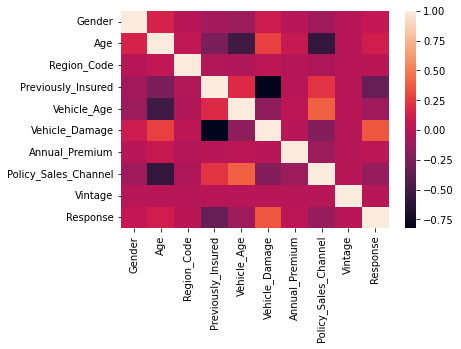

In [28]:
sns.heatmap(X_train.assign(Response=y_train).corr())

<AxesSubplot:>

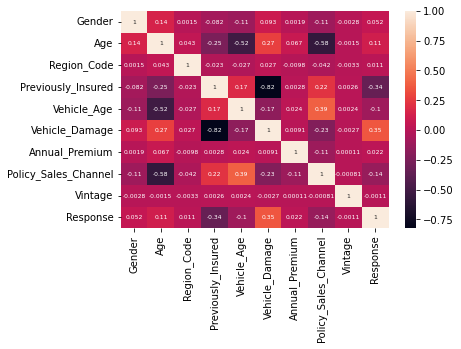

In [29]:
sns.heatmap(X_train.assign(Response=y_train).corr(), annot=True, annot_kws={"size":6})

In [30]:
X_train=X_train.drop(['Gender', 'Age', 'Region_Code', 'Previously_Insured', 'Annual_Premium', 'Vintage'], axis=1)
X_test=X_test.drop(['Gender', 'Age', 'Region_Code', 'Previously_Insured', 'Annual_Premium', 'Vintage'], axis=1)

# Modelling using RandomForestClassifier

In [33]:
clf=RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [34]:
predictions=clf.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))

[[100172     23]
 [ 14119     19]]
0.8763086772847735


# Class Balancing

In [35]:
df['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

# Upsampling on Training data

In [36]:
trained_df=X_train.assign(Response=y_train)

trained_df=trained_df.append(trained_df[trained_df['Response']==1])
trained_df=trained_df.append(trained_df[trained_df['Response']==1])
trained_df=trained_df.append(trained_df[trained_df['Response']==1])
print(trained_df['Response'].value_counts())
trained_df

1    260576
0    234204
Name: Response, dtype: int64


C:\Users\PB937FZ\AppData\Local\Temp\ipykernel_18444\1377877846.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trained_df=trained_df.append(trained_df[trained_df['Response']==1])
C:\Users\PB937FZ\AppData\Local\Temp\ipykernel_18444\1377877846.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trained_df=trained_df.append(trained_df[trained_df['Response']==1])
C:\Users\PB937FZ\AppData\Local\Temp\ipykernel_18444\1377877846.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trained_df=trained_df.append(trained_df[trained_df['Response']==1])


,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Response
55914,0,1,124.0,0
179876,2,1,26.0,1
300095,1,0,152.0,0
60078,0,0,124.0,0
312426,1,1,152.0,0
...,...,...,...,...
347449,0,1,26.0,1
321879,0,1,124.0,1
64820,1,1,154.0,1
175203,0,1,26.0,1


In [56]:
y_test.value_counts()

0    100195
1     14138
Name: Response, dtype: int64

# Modelling of upsampled data 

In [50]:
clf=RandomForestClassifier()
clf.fit(trained_df.drop(['Response'],axis=1), trained_df['Response'])

RandomForestClassifier()

# Results - Accuracy and confusion matrix

In [51]:
predictions=clf.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))

[[59882 40313]
 [  504 13634]]
0.642998959180639


In [52]:
predictions=clf.predict(trained_df.drop(['Response'],axis=1))
print(confusion_matrix(trained_df['Response'],predictions))
print(accuracy_score(trained_df['Response'],predictions))

[[139407  94797]
 [  9176 251400]]
0.7898601398601398


# Undersampling

In [45]:
from imblearn.under_sampling import RandomUnderSampler
  

UnderS = RandomUnderSampler(random_state=42,
                            replacement=True)
  
# Fit predictor (x variable)
# and target (y variable) using fit_resample()
X_under, y_under = UnderS.fit_resample(X_train, y_train)

In [47]:
y_train.value_counts()

0    234204
1     32572
Name: Response, dtype: int64

In [48]:
y_under.value_counts()

0    32572
1    32572
Name: Response, dtype: int64

In [53]:
clf=RandomForestClassifier()
clf.fit(X_under, y_under)

RandomForestClassifier()

In [54]:
predictions=clf.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))

[[67519 32676]
 [ 1510 12628]]
0.700996212816947


In [55]:
predictions=clf.predict(X_under)
print(confusion_matrix(y_under,predictions))
print(accuracy_score(y_under,predictions))

[[21915 10657]
 [ 3504 29068]]
0.7826200417536534
